<a href="https://www.kaggle.com/code/mosesmoncy/demand-order-prediction?scriptVersionId=128450403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Demand order prediction is an important application of machine learning in supply chain management. It involves using historical data on customer demand to predict future demand and optimize inventory levels, production schedules, and delivery routes. By accurately predicting demand orders, businesses can ensure that they have the right products in the right quantities at the right locations, which can lead to increased sales and reduced costs.

In this project,the model predicts 'Target' using Regression Models.. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
a=pd.read_csv('/kaggle/input/forecast-dataset-csv/Daily Demand Forecasting Orders.csv')
a

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [4]:
a.columns

Index(['Unnamed: 0',
       'Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [5]:
a.rename(columns={'Week of the month (first week, second, third, fourth or fifth week': 'Week',
                  'Day of the week (Monday to Friday)':'Day','Banking orders (1)':'Banking orders1',
                  'Banking orders (2)':'Banking orders2','Banking orders (3)':'Banking orders3',
                  'Target (Total orders)':'Target'},inplace=True)

In [6]:
a

,Unnamed: 0,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders1,Banking orders2,Banking orders3,Target
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [7]:
# read first five data

a.head()

,Unnamed: 0,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders1,Banking orders2,Banking orders3,Target
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [8]:
# read last five data

a.tail()

,Unnamed: 0,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders1,Banking orders2,Banking orders3,Target
55,55,5,2,158.716,158.133,59.131,92.639,165.079,0.000,32027,33282,128269,9287,316.849
56,56,5,3,150.784,133.069,54.224,115.746,116.442,2.559,51235,34421,87708,11354,286.412
57,57,5,4,193.534,109.639,58.378,142.382,102.687,274.000,28364,88404,91367,15003,303.447
58,58,5,5,196.555,108.395,76.763,96.478,131.709,0.000,37011,109931,50112,12957,304.950
59,59,5,6,192.116,121.106,107.568,121.152,103.180,18.678,27328,108072,56015,10690,331.900


In [9]:
a.shape

(60, 14)

In [10]:
a.describe

<bound method NDFrame.describe of     Unnamed: 0  Week  Day  Non-urgent order  Urgent order  Order type A  \
0            0     1    4           316.307       223.270        61.543   
1            1     1    5           128.633        96.042        38.058   
2            2     1    6            43.651        84.375        21.826   
3            3     2    2           171.297       127.667        41.542   
4            4     2    3            90.532       113.526        37.679   
5            5     2    4           110.925        96.360        30.792   
6            6     2    5           144.124       118.919        43.304   
7            7     2    6           119.379       113.870        38.584   
8            8     3    2           218.856       124.381        33.973   
9            9     3    3           146.518       101.045        36.399   
10          10     3    4           178.433       102.793        45.706   
11          11     3    5           145.865        91.180        4

In [11]:
a.dtypes

Unnamed: 0                                     int64
Week                                           int64
Day                                            int64
Non-urgent order                             float64
Urgent order                                 float64
Order type A                                 float64
Order type B                                 float64
Order type C                                 float64
Fiscal sector orders                         float64
Orders from the traffic controller sector      int64
Banking orders1                                int64
Banking orders2                                int64
Banking orders3                                int64
Target                                       float64
dtype: object

In [12]:
a.isna().sum()

Unnamed: 0                                   0
Week                                         0
Day                                          0
Non-urgent order                             0
Urgent order                                 0
Order type A                                 0
Order type B                                 0
Order type C                                 0
Fiscal sector orders                         0
Orders from the traffic controller sector    0
Banking orders1                              0
Banking orders2                              0
Banking orders3                              0
Target                                       0
dtype: int64

In [13]:
a=a.drop(['Unnamed: 0'],axis=1)
a

,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders1,Banking orders2,Banking orders3,Target
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


Boxplots to look for outliers

<AxesSubplot:ylabel='Target'>

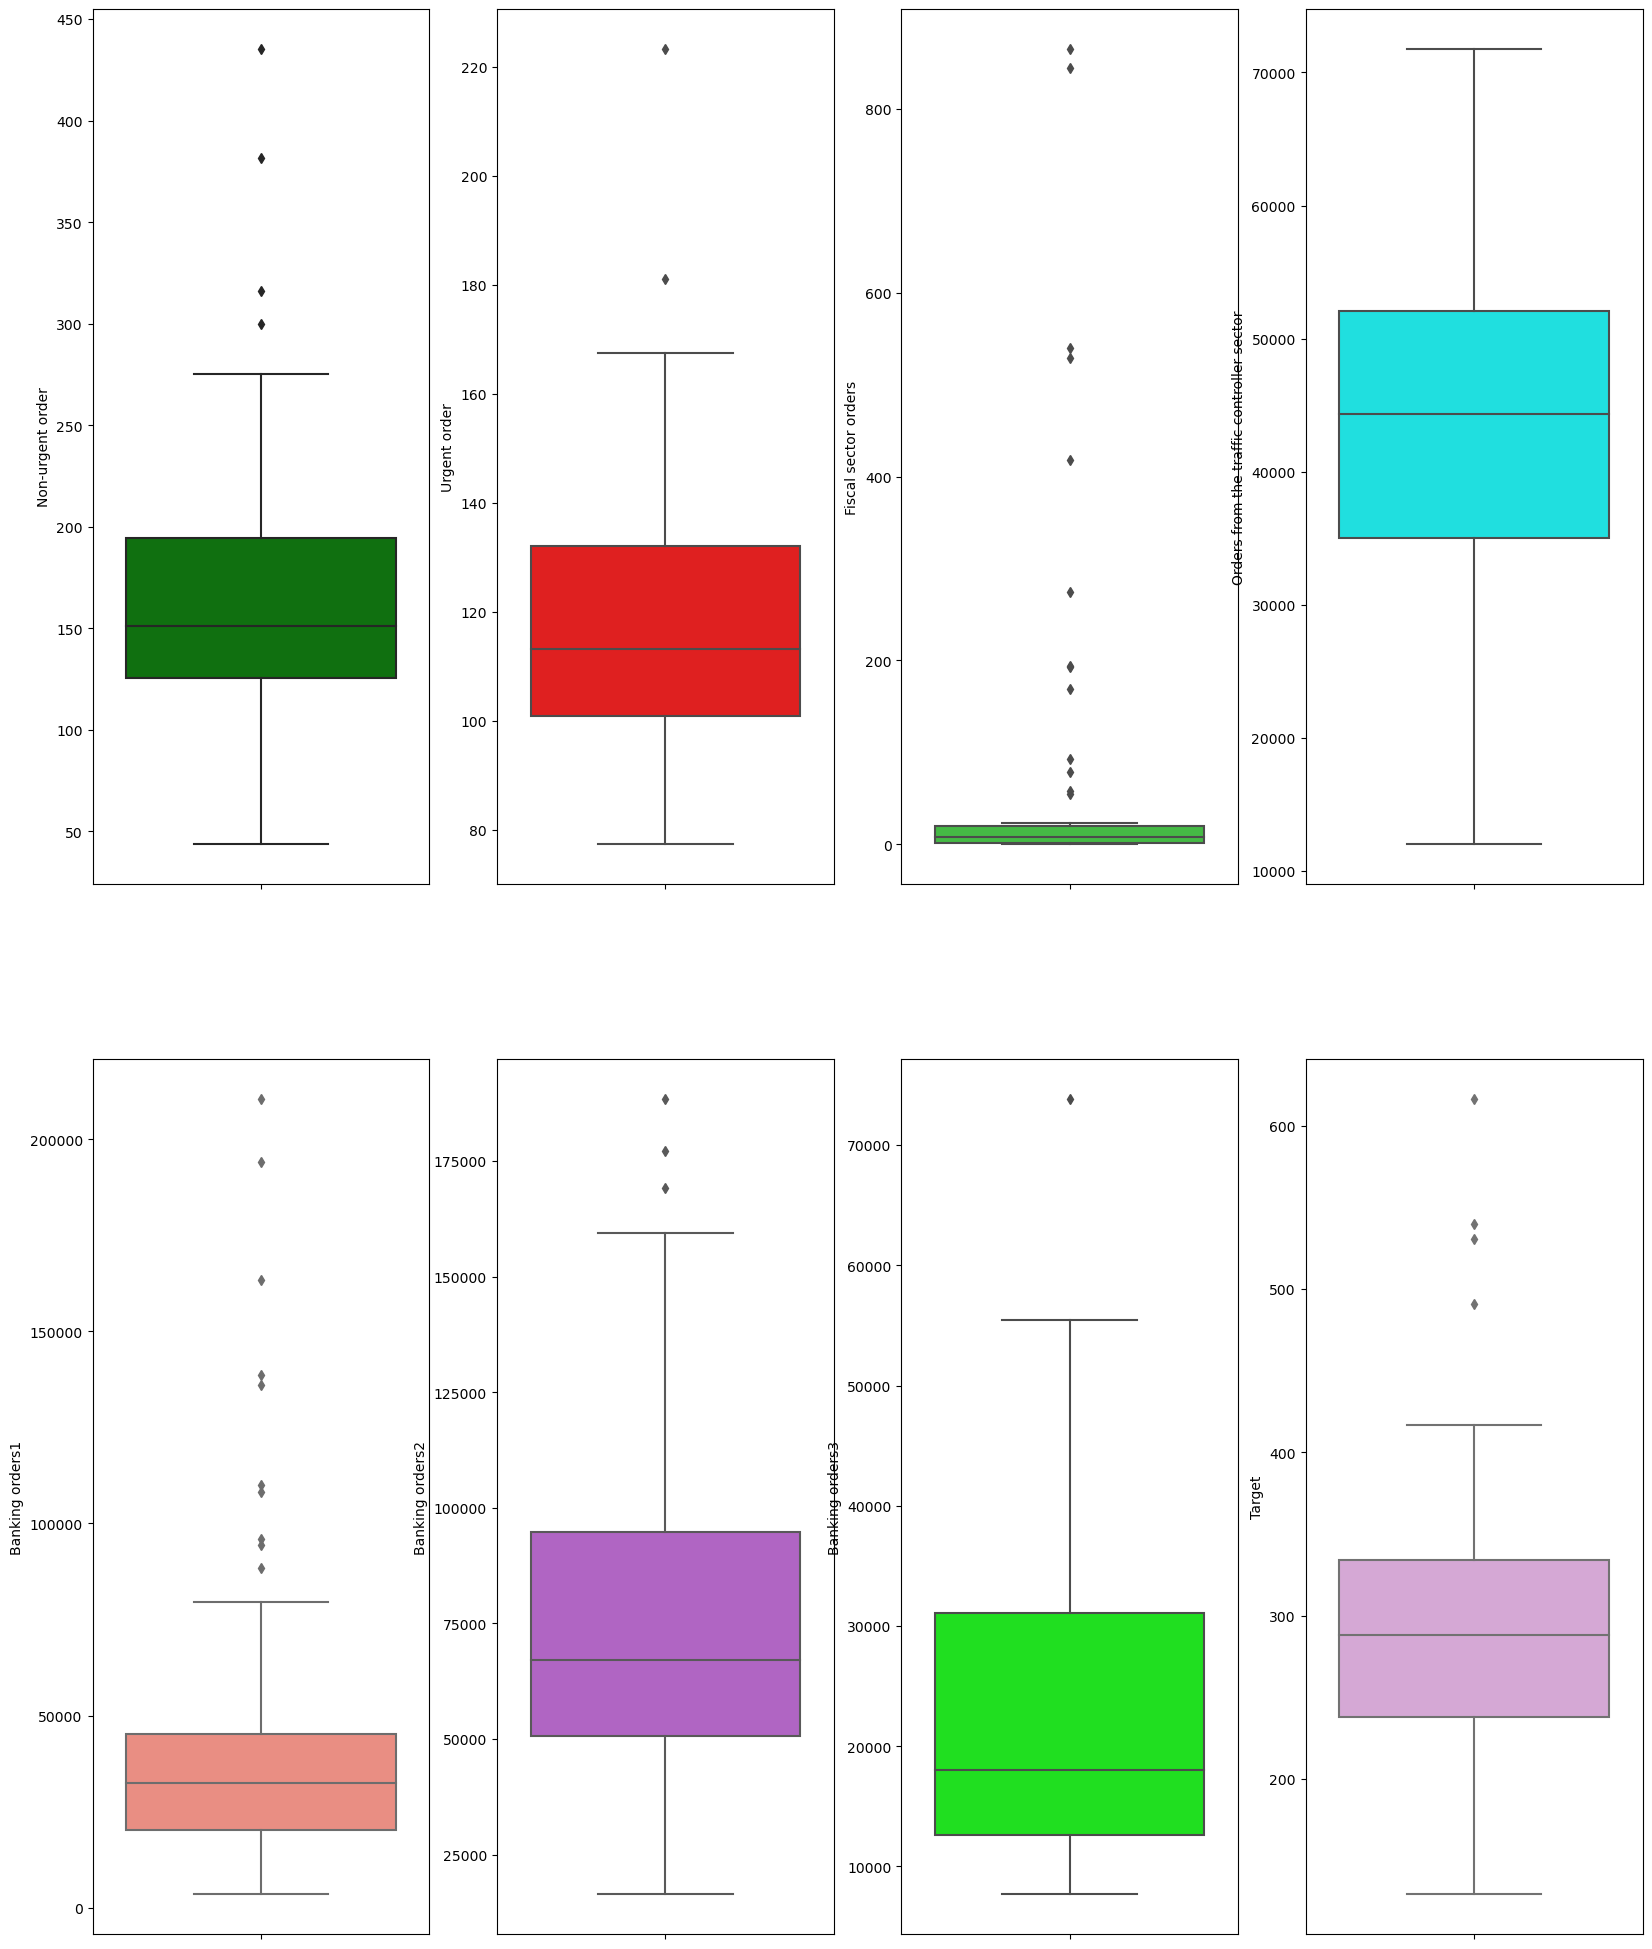

In [14]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (20,25))
sns.boxplot(ax = ax1, y = 'Non-urgent order', data = a, color = 'green')
sns.boxplot(ax = ax2, y = 'Urgent order', data = a, color = 'red')
sns.boxplot(ax = ax3, y = 'Fiscal sector orders', data = a, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Orders from the traffic controller sector', data = a, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Banking orders1', data = a, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Banking orders2', data = a, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Banking orders3', data = a, color = 'lime')
sns.boxplot(ax = ax8, y = 'Target', data = a, color = 'plum')

In [15]:
a['Week'].value_counts()

2    15
3    14
4    14
5     9
1     8
Name: Week, dtype: int64

<AxesSubplot:xlabel='Banking orders3', ylabel='Count'>

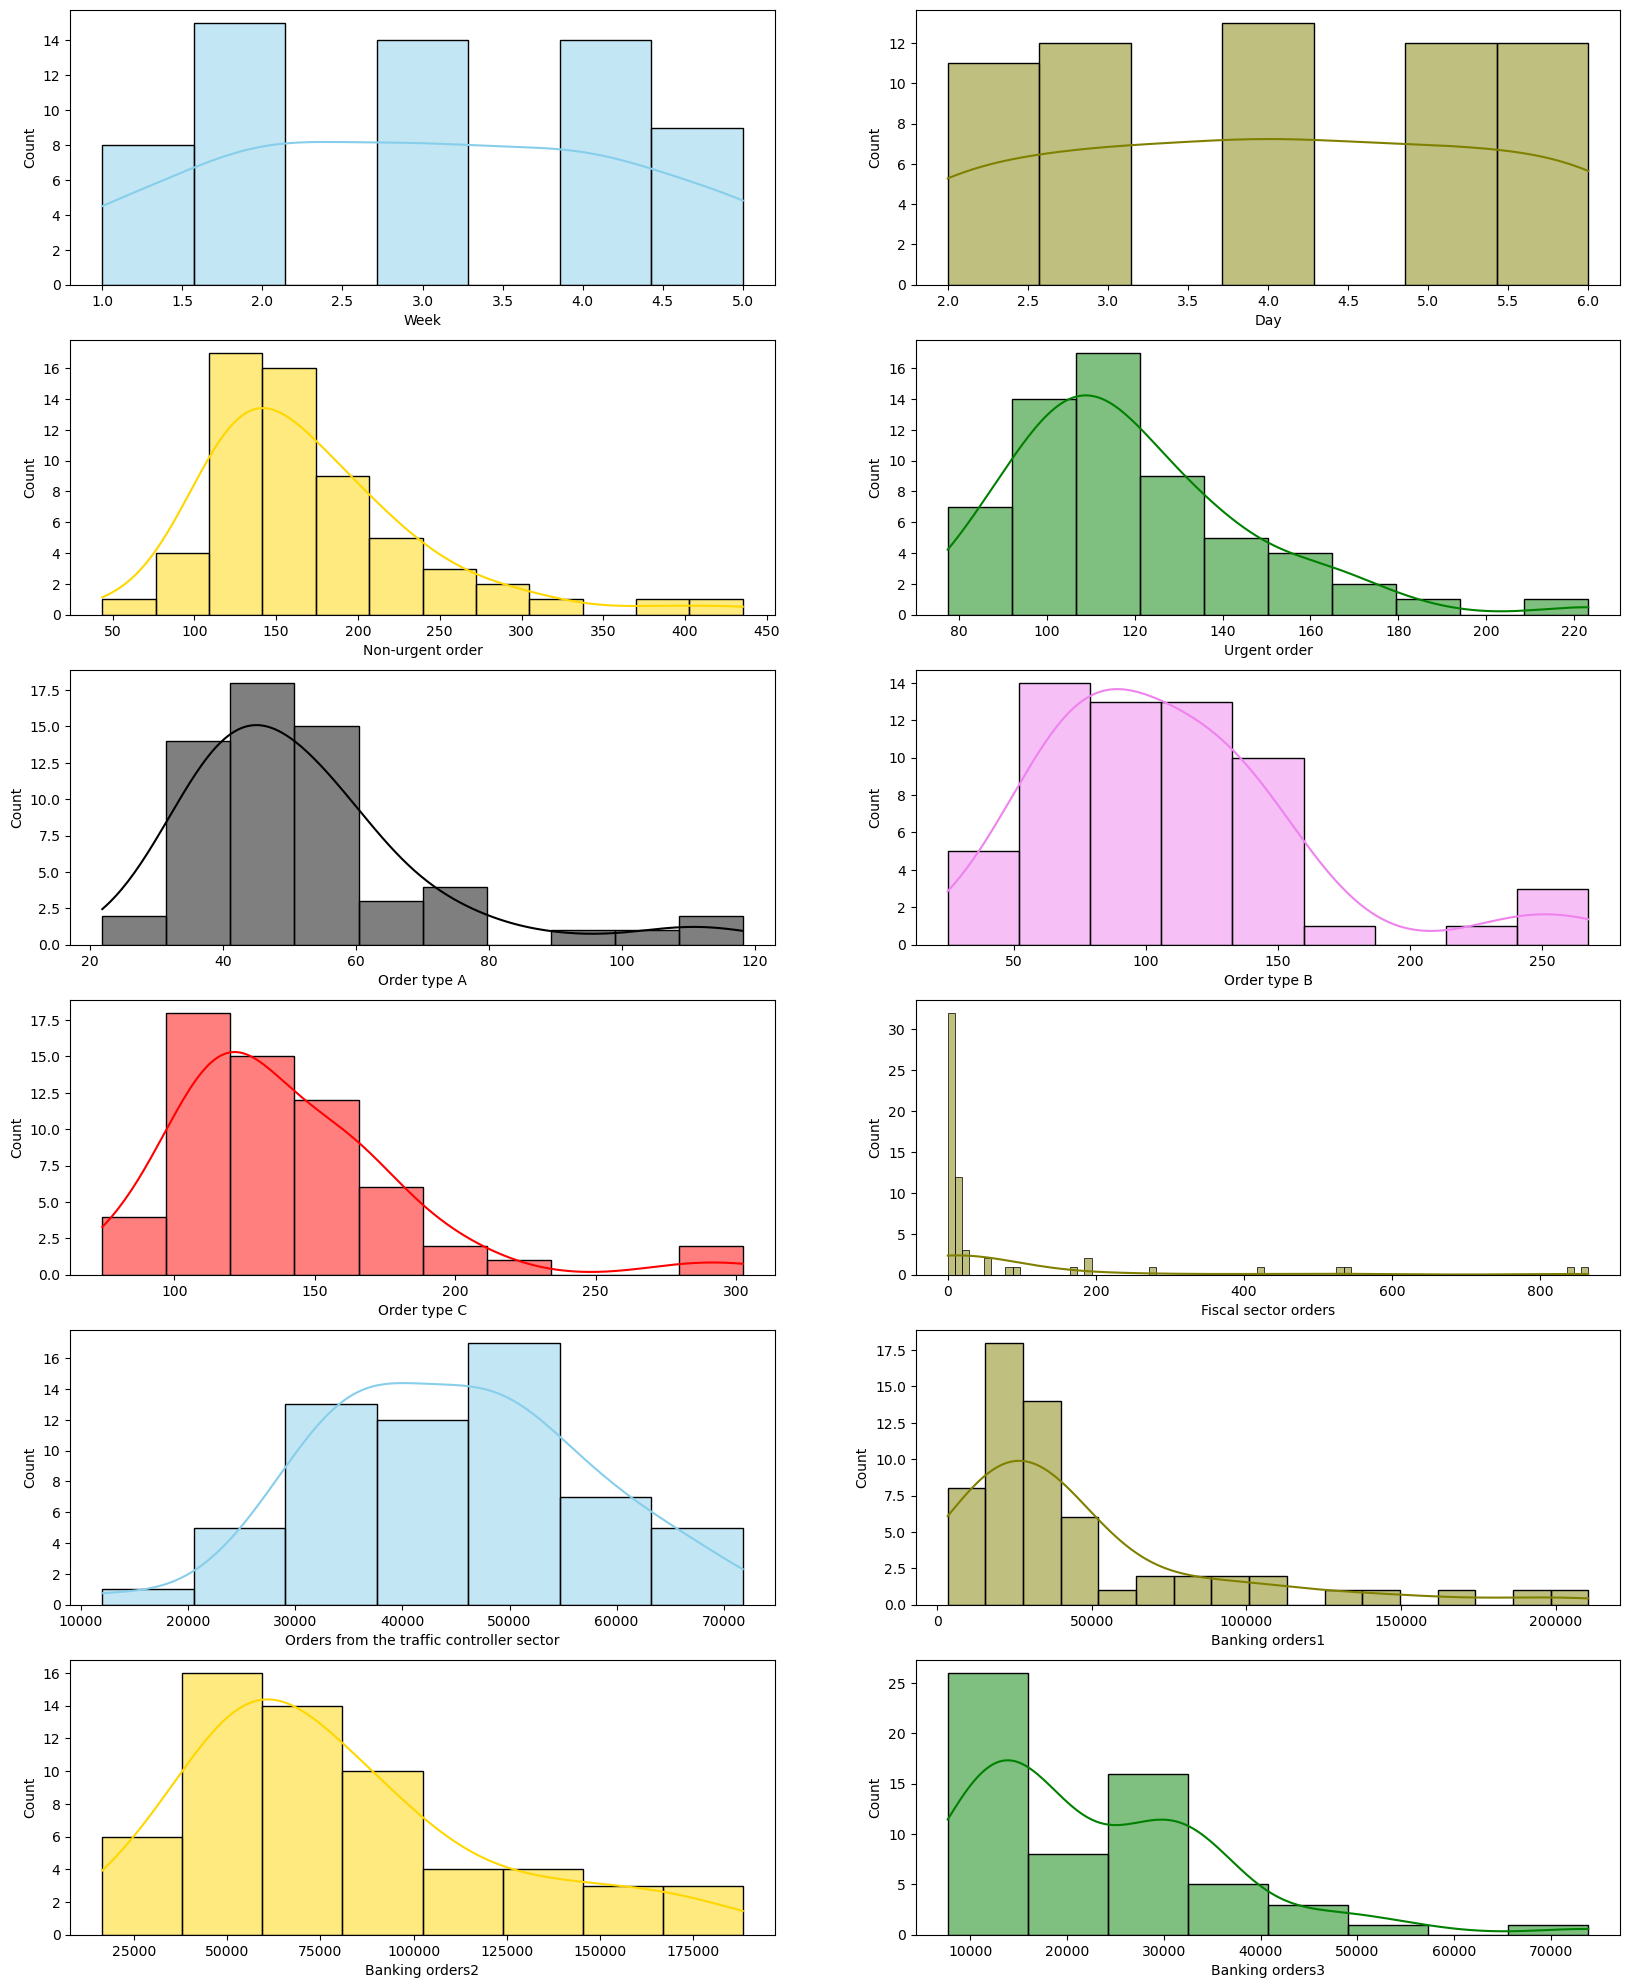

In [16]:
fig, axs = plt.subplots(6, 2, figsize=(20, 25))

sns.histplot(data=a['Week'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['Day'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['Non-urgent order'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['Urgent order'], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a['Order type A'], kde=True, color="black", ax=axs[2, 0])
sns.histplot(data=a['Order type B'], kde=True, color="violet", ax=axs[2, 1])
sns.histplot(data=a['Order type C'], kde=True, color="red", ax=axs[3, 0])
sns.histplot(data=a['Fiscal sector orders'], kde=True, color="olive", ax=axs[3, 1])             
sns.histplot(data=a['Orders from the traffic controller sector'], kde=True, color="skyblue", ax=axs[4, 0])
sns.histplot(data=a['Banking orders1'], kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=a['Banking orders2'], kde=True, color="gold", ax=axs[5, 0])
sns.histplot(data=a['Banking orders3'], kde=True, color="green", ax=axs[5, 1])



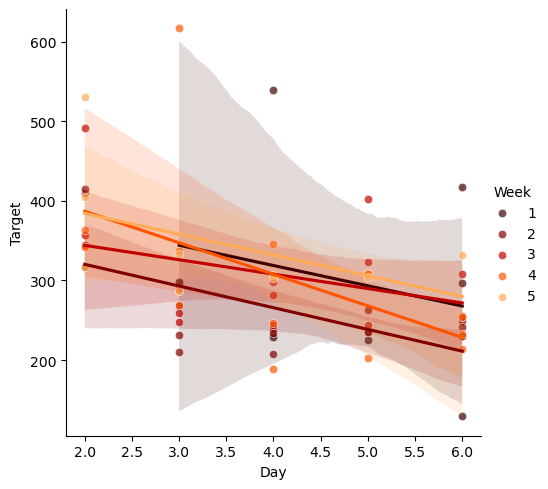

In [17]:
sns.lmplot(x = 'Day', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

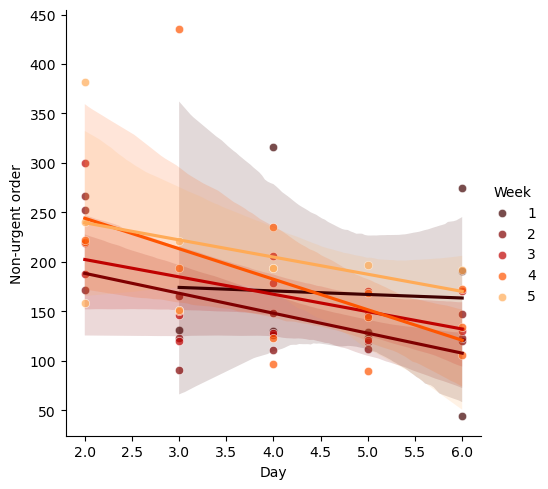

In [18]:
sns.lmplot(x = 'Day', y = 'Non-urgent order', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

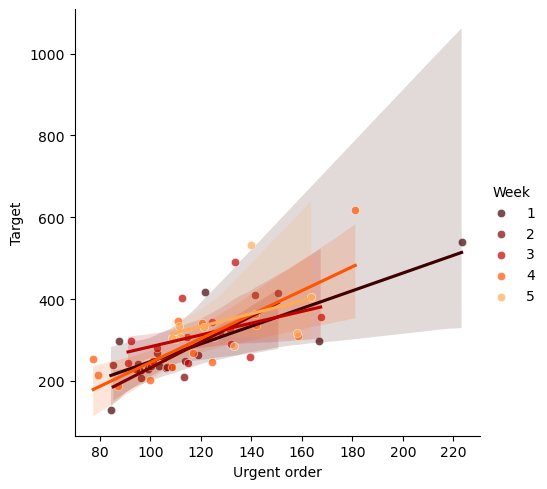

In [19]:
sns.lmplot(x = 'Urgent order', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

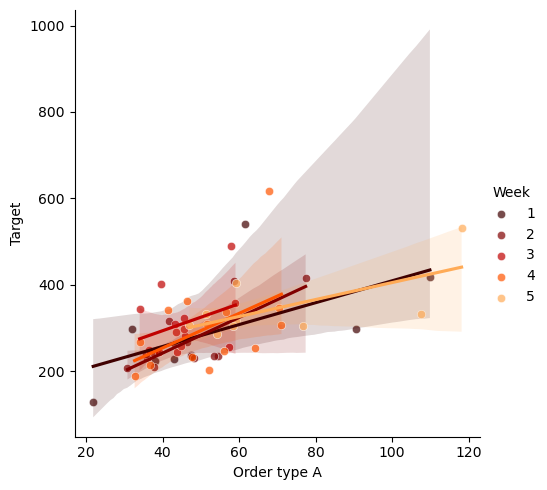

In [20]:
sns.lmplot(x = 'Order type A', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

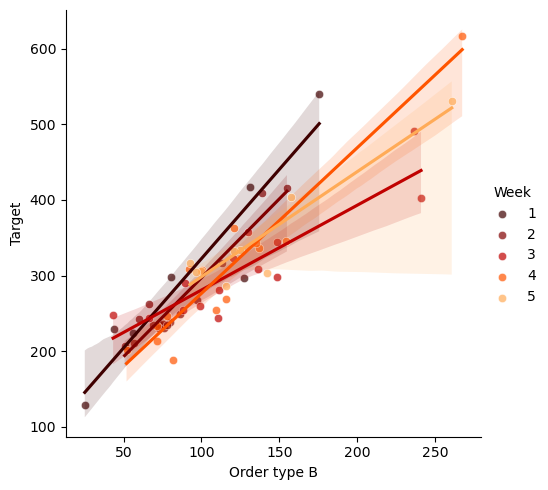

In [21]:
sns.lmplot(x = 'Order type B', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

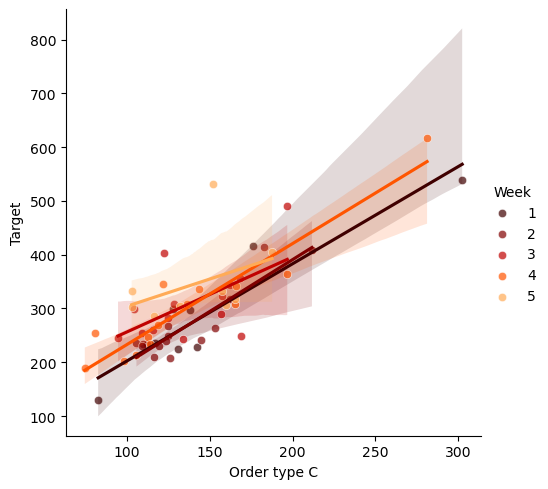

In [22]:
sns.lmplot(x = 'Order type C', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

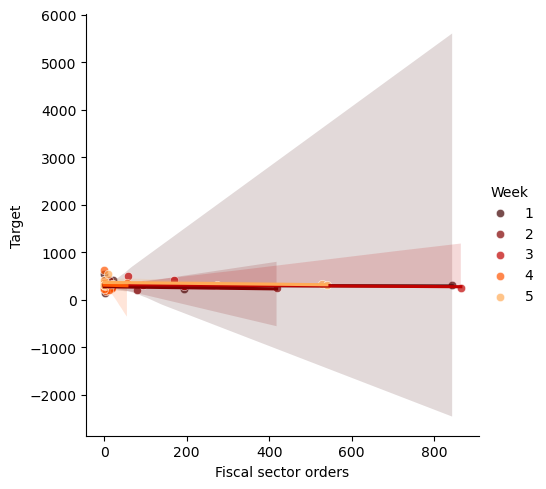

In [23]:
sns.lmplot(x = 'Fiscal sector orders', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

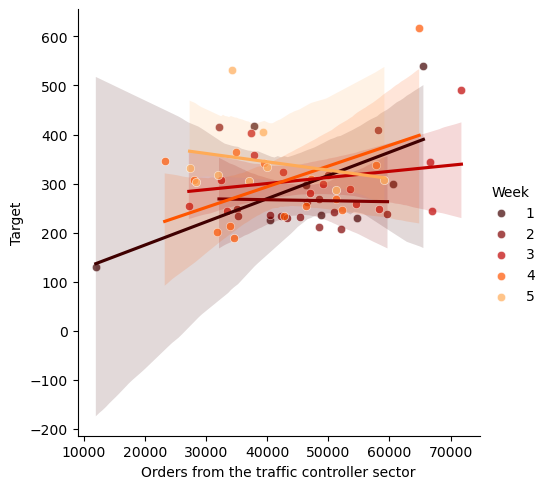

In [24]:
sns.lmplot(x = 'Orders from the traffic controller sector', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

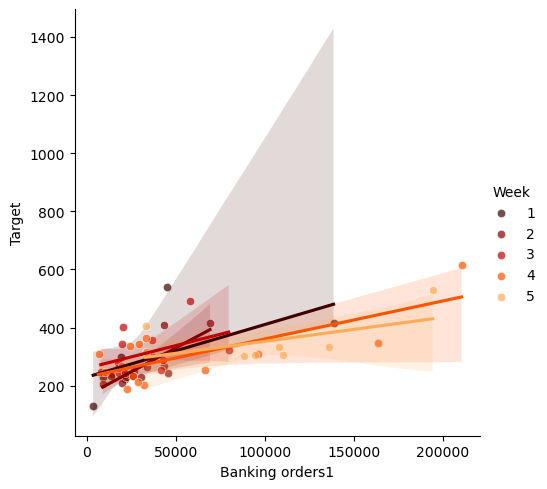

In [25]:
sns.lmplot(x = 'Banking orders1', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

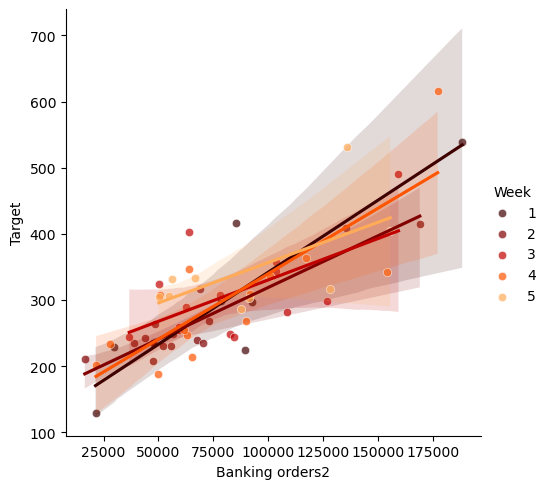

In [26]:
sns.lmplot(x = 'Banking orders2', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

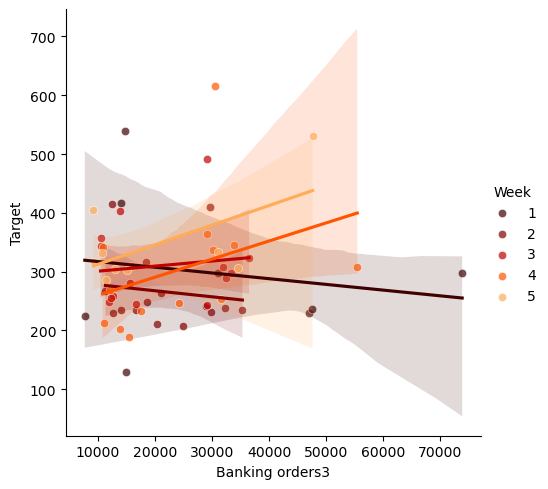

In [27]:
sns.lmplot(x = 'Banking orders3', y = 'Target', data = a, hue = 'Week', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

<AxesSubplot:>

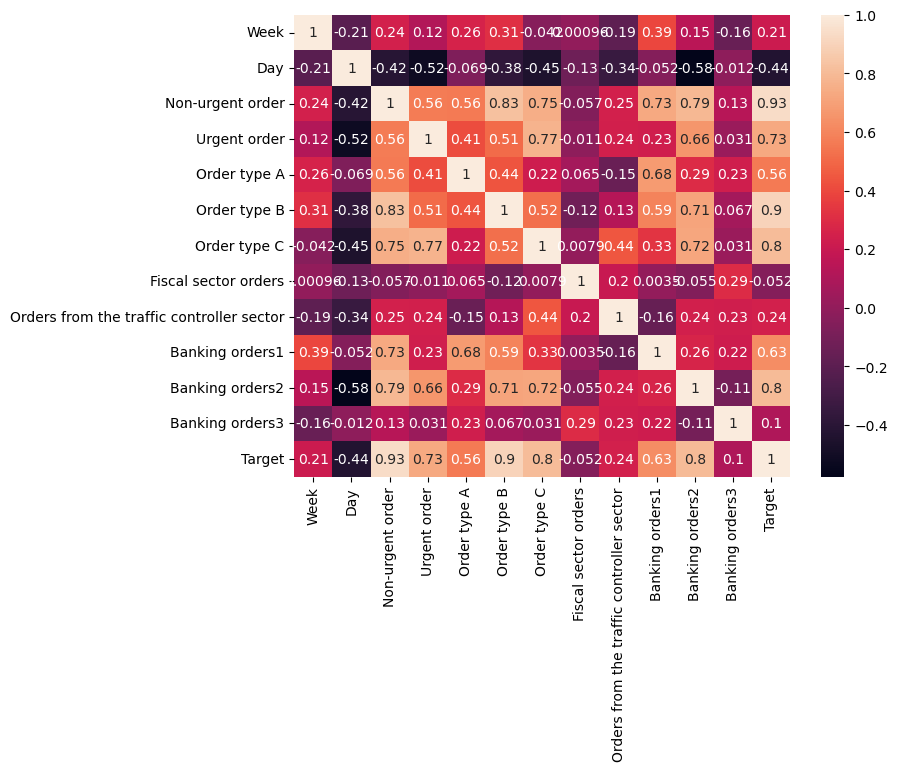

In [28]:
plt.figure(figsize = (8,6))
corr = a.corr()
sns.heatmap(corr, annot = True)

In [29]:
# splitting x(inputs) and y(outputs)

x=a.drop(['Target'],axis=1)
y=a["Target"]
x

,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders1,Banking orders2,Banking orders3
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948


In [30]:
# Training and Testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [31]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders1,Banking orders2,Banking orders3
24,2.686803,3.659232,123.970301,106.582287,36.903283,76.537057,119.840567,2.224866,45339.923407,22109.552459,55584.675350,29802.057839
39,2.510966,4.565202,273.580915,121.745950,106.720111,130.372665,175.313957,20.073967,37906.614744,138532.692948,85378.056690,14020.808113
15,3.038476,3.961222,123.569523,124.231143,55.947415,78.762376,113.485426,0.455411,52320.274198,10046.952342,62799.525533,24232.675530
31,2.862639,4.263212,170.965796,131.230279,45.913095,120.046522,157.396794,21.262407,42534.184355,79554.648113,50433.782308,36481.317052
43,2.686803,4.263212,113.239869,107.124193,47.660618,78.284827,110.534860,15.946216,35316.855605,25876.427584,38647.027060,13989.811550
52,3.038476,3.961222,97.728647,88.335198,33.723905,82.142177,75.878209,5.163199,34631.919308,22420.542149,49644.798691,15390.656185
18,3.214313,3.357242,239.690984,162.556926,58.752526,156.162247,186.872058,0.455411,39273.487617,32917.194178,155615.598206,9204.342299
40,2.686803,3.357242,251.151090,149.920217,76.003769,153.421448,182.333932,12.370135,32134.151613,69091.994957,169086.318486,12516.974900
55,3.214313,3.357242,158.999547,157.131066,58.748745,92.902101,164.823709,0.455411,32028.161471,33282.182078,128268.166076,9288.332984
13,3.038476,3.357242,219.684542,140.886504,46.566171,120.354838,195.434485,2.072276,34878.896338,32905.194575,117136.397227,29187.126040


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [33]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_lr=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_lr)
mean_absolute_percentage_error_lr=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_lr)

Mean Absolute Error is 11814.79496598503
Mean Absolute Percentage Error is 38.55847423517774
Mean Squared Error is 153316055.4386072
Root Mean Square Error is 12382.086069746374
r2_score is  -16966.839492931806
Mean Absolute Percentage Error is 38.55847423517774


In [34]:
# Creating Decision Tree Regression 

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_tree=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_tree)
mean_absolute_percentage_error_tree=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_tree)

Mean Absolute Error is 310.1112222222222
Mean Squared Error is 105204.65530433331
Root Mean Square Error is 324.35267118421166
r2_score is  -10.64324049432615
Mean Absolute Percentage Error is 1.1936832383959972


In [35]:
# Creating Random Forest Regression 

forest=RandomForestRegressor()
forest.fit(x_train,y_train)

y_pred=forest.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_forest=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_forest)
mean_absolute_percentage_error_forest=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_forest)

Mean Absolute Error is 254.0912955555565
Mean Squared Error is 73504.06427190376
Root Mean Square Error is 271.1163297772817
r2_score is  -7.134863377979537
Mean Absolute Percentage Error is 0.9939398928209601
